# Packages

In [23]:
pip install  import_ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install ndlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Read Data

In [16]:
Graph = nx.read_edgelist('Data/facebookData.txt',create_using=nx.Graph(),nodetype=int)

# Read Decision Matrix

In [17]:
#Read our decision Matrix
res = pd.read_csv("Data/res.csv")
res.head(10)

,Node,DC,BC,CC,EC,S+,S-,C
0,107,0.258791,0.480518,0.459699,2.606940e-04,0.019029,0.200396,0.913277
1,1684,0.196137,0.337797,0.393606,7.164260e-06,0.061948,0.141539,0.695566
2,1912,0.186974,0.229295,0.350947,9.540696e-02,0.102563,0.100961,0.496063
3,3437,0.135463,0.236115,0.314413,9.531613e-08,0.103349,0.098846,0.488865
4,0,0.085934,0.146306,0.353343,3.391796e-05,0.140349,0.061395,0.304321
5,1085,0.016345,0.149015,0.357852,3.164082e-06,0.142845,0.060458,0.297379
6,698,0.016840,0.115330,0.271189,1.116876e-09,0.155715,0.046803,0.231106
7,567,0.015602,0.096310,0.328881,9.932295e-06,0.163087,0.039165,0.193646
8,58,0.002972,0.084360,0.397402,5.898120e-04,0.168330,0.034346,0.169464
9,428,0.028479,0.064309,0.394837,5.990065e-04,0.174851,0.026805,0.132923


# The top-10 ranked nodes by Topsis and Centrality measures

In [18]:
#The top-10 ranked nodes by degree centrality (DC)
DCR = res[["Node", "DC"]]
DCR = DCR.sort_values(by='DC', ascending=False)
DCR.rename(columns = {'Node':'DCN'}, inplace=True)

DCR["DCN"].to_csv("Data/DCR.csv",index=False)

In [19]:
#The top-10 ranked nodes by betweenness centrality (BC)
BCR = res[["Node", "BC"]]
BCR = BCR.sort_values(by='BC', ascending=False)
BCR.rename(columns = {'Node':'BCN'}, inplace=True)

BCR["BCN"].to_csv("Data/BCR.csv",index=False)

In [20]:
#The top-10 ranked nodes by closeness centrality (CC)
CCR = res[["Node", "CC"]]
CCR = CCR.sort_values(by='CC', ascending=False)
CCR.rename(columns = {'Node':'CCN'}, inplace=True)

CCR["CCN"].to_csv("Data/CCR.csv",index=False)

In [21]:
#The top-10 ranked nodes by eigenvector centrality (EC)
ECR = res[["Node", "EC"]]
ECR = ECR.sort_values(by='EC', ascending=False)
ECR.rename(columns = {'Node':'ECN'}, inplace=True)

ECR["ECN"].to_csv("Data/ECR.csv",index=False)

In [22]:
fac = pd.concat([pd.read_csv("Data/DCR.csv"),pd.read_csv("Data/BCR.csv"), pd.read_csv("Data/CCR.csv"), pd.read_csv("Data/ECR.csv")],axis=1)

In [23]:
#Concate the results
facebook = pd.concat([fac,pd.read_csv("Data/Topsis.csv")],axis=1)

facebook = facebook.head(10)
facebook

,DCN,BCN,CCN,ECN,Node
0,107,107,107,1912,10.0
1,1684,1684,58,2266,2.0
2,1912,3437,428,2206,12.0
3,3437,1912,563,2233,1.0
4,0,1085,1684,2464,35.0
5,2543,0,171,2142,3.0
6,2347,698,348,2218,24.0
7,1888,567,483,2078,16.0
8,1800,58,414,2123,8.0
9,1663,428,376,1993,9.0


# Application SI Model

In [35]:
def SI(nodes):
    n = 4039
    Lst = []
    model = ep.SIModel(Graph)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration('Infected', nodes)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'Nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break
    
    Lst.append(res['iteration'].tolist())
    Lst.append(res['Nb_Susceptible'].tolist())
    Lst.append(res['Nb_infected'].tolist())
                     
    return Lst

In [36]:
Rank_DC = set(facebook['DCN'])
Rank_BC = set(facebook['BCN'])
Rank_CC = set(facebook['CCN'])
Rank_EC = set(facebook['ECN'])
Rank_Topsis = set(facebook['Node'])


In [47]:
DClst = []
BClst = []
CClst = []
EClst = []
TOPSISlst = []
for i in range(10):
    DClst.append(SI(Rank_DC))
    BClst.append(SI(Rank_BC))
    CClst.append(SI(Rank_CC))
    EClst.append(SI(Rank_EC))
    TOPSISlst.append(SI(Rank_Topsis))

In [48]:
def Std_mean(lis):
    dc = {}
    sd = []
    mean = []
    for i in range(10):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]
    for i in range(10):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][2][j])
    for i in dc:
        sd.append(np.std(dc[i]))
        mean.append(np.mean(dc[i]))
    return mean, sd

In [49]:
DCmean, DCsd = Std_mean(DClst)
BCmean, BCsd = Std_mean(BClst)
CCmean, CCsd = Std_mean(CClst)
ECmean, ECsd = Std_mean(EClst)
TOPSISmean, TOPSISsd = Std_mean(TOPSISlst)

# Plot the results

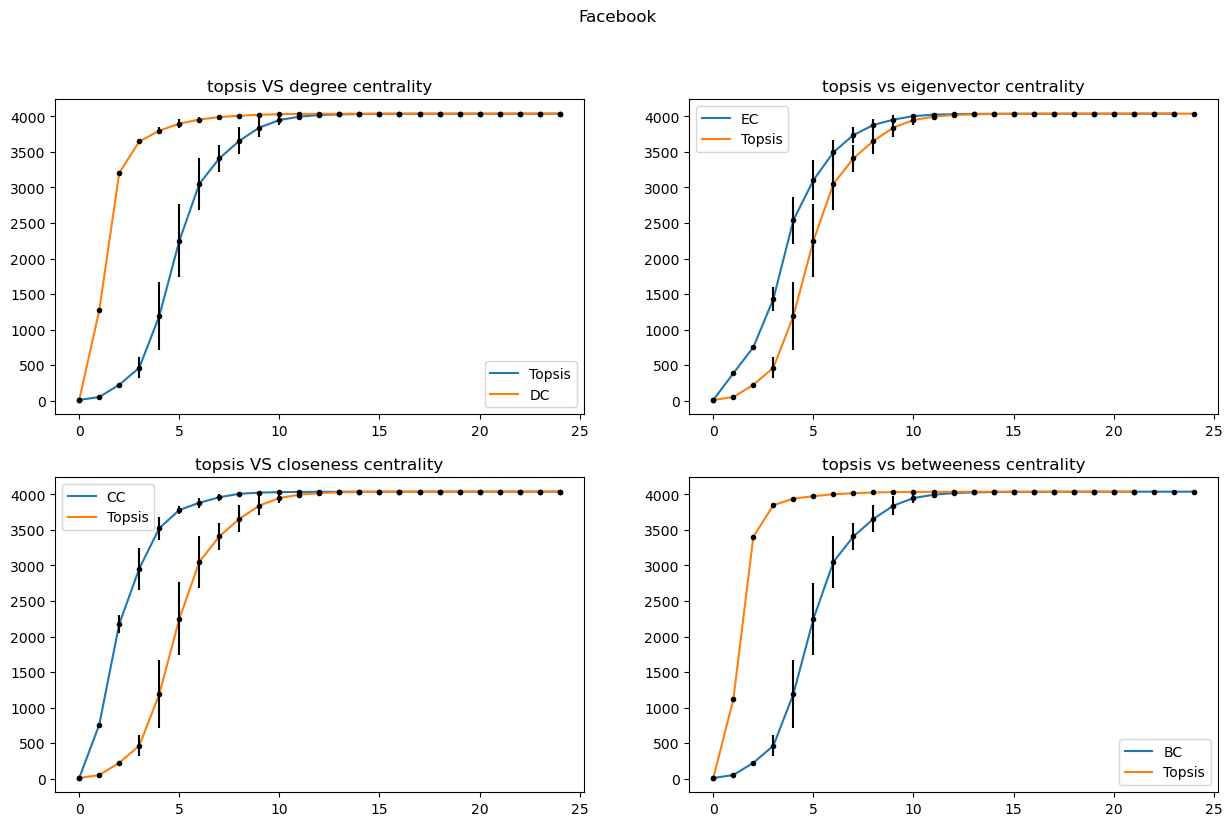

In [51]:

fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 0].plot(list(range(len(DCmean))) , DCmean, label='DC')
ax[0, 0].errorbar(list(range(len(DCmean))), DCmean, yerr=DCsd, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(list(range(len(CCmean))) , CCmean, label='CC')
ax[1, 0].errorbar(list(range(len(CCmean))) , CCmean, yerr=CCsd, fmt ='.k')
ax[1, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[1, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(list(range(len(ECmean))) , ECmean, label='EC')
ax[0, 1].errorbar(list(range(len(ECmean))) , ECmean, yerr=ECsd, fmt ='.k')
ax[0, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='BC')
ax[1, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 1].plot(list(range(len(BCmean))) , BCmean, label='Topsis')
ax[1, 1].errorbar(list(range(len(BCmean))) , BCmean, yerr=BCsd, fmt ='.k')
ax[1, 1].legend()


fig.suptitle('Facebook')
plt.show()